<a href="https://colab.research.google.com/github/abhayajith19/HR_Analytics/blob/master/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
train=pd.read_csv('train.csv')

In [ ]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [ ]:
train['education'].fillna(train['education'].mode()[0],inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0],inplace=True)

In [ ]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
objectColumns = train.select_dtypes(include=np.object).columns
objectColumns 

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [ ]:
numericalColumns = train.select_dtypes(include=np.number).columns
numericalColumns 


Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
continuesCols=[]

for column in numericalColumns:
    if train[column].nunique()>20:
        continuesCols.append(column)

In [ ]:
continuesCols

['employee_id', 'age', 'length_of_service', 'avg_training_score']

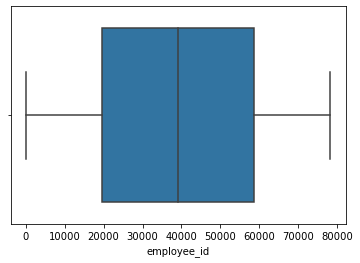

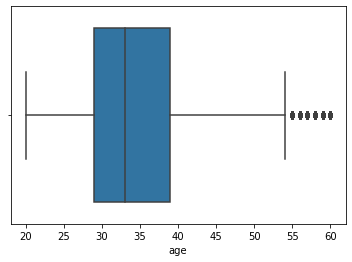

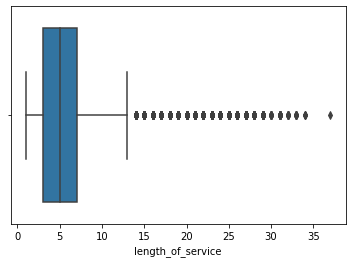

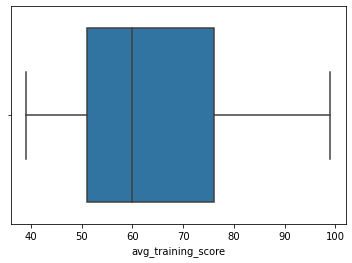

In [ ]:
for i in continuesCols:
    plt.figure()
    sns.boxplot(train[i])

In [ ]:
trainObjectDF = train[objectColumns]

In [ ]:
from collections import defaultdict
defaultEncoder= defaultdict(LabelEncoder)

fittrainObjectDF= trainObjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))

In [ ]:
train.drop(objectColumns,axis=1,inplace=True)

In [ ]:
upd_train=pd.concat([train,fittrainObjectDF],axis=1)

In [ ]:
upd_train

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438,1,35,5.0,8,1,0,49,0,7,31,2,0,2
1,65141,1,30,5.0,4,0,0,60,0,4,14,0,1,0
2,7513,1,34,3.0,7,0,0,50,0,7,10,0,1,2
3,2542,2,39,1.0,10,0,0,50,0,7,15,0,1,0
4,48945,1,45,3.0,2,0,0,73,0,8,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,8,5,0,1,2
54804,74592,1,37,2.0,6,0,0,56,0,4,19,2,0,0
54805,13918,1,27,5.0,3,1,0,79,0,0,0,0,1,0
54806,13614,1,29,1.0,2,0,0,45,0,7,33,0,1,2


In [ ]:
corrdf=upd_train.corr()

In [ ]:
corr_cols=abs(corrdf.is_promoted).sort_values(ascending=False)

In [ ]:
corr_cols

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.153230
education               0.029257
no_of_trainings         0.024896
age                     0.017166
gender                  0.011109
length_of_service       0.010670
region                  0.008841
recruitment_channel     0.002229
employee_id             0.001206
department              0.000130
Name: is_promoted, dtype: float64